###### Importing Packages

In [179]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #white background style for seaborn plots
sns.set(style="whitegrid", color_codes=True)

###### Loading Data

In [180]:
# Read CSV train data file into DataFrame
train_df=pd.read_csv('C:\\Users\\dicks\\Documents\\titanic\\train.csv')
# Read CSV test data file into DataFrame
test_df=pd.read_csv('C:\\Users\\dicks\\Documents\\titanic\\test.csv')
train_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [181]:
print('The number of samples into the train data is {}.'.format(train_df.shape[0]))

The number of samples into the train data is 891.


In [182]:
print('The number of samples into the test data is {}.'.format(test_df.shape[0]))

The number of samples into the test data is 418.


###### The data has been split into two groups:
###### (a). training set (train.csv) 
###### (b). test set (test.csv). 
###### The training set should be used to build your machine learning models. 
###### The test set should be used to see how well your model performs on unseen data. 
###### For each passenger in the test set, we use the model we train to predict whether or not they survived the sinking of the Titanic.
### Data Dictionary
###### Variable Definition: Key
###### survival Survival: 0 = No, 1 = Yes
###### pclass Ticket class: 1 = 1st, 2 = 2nd, 3 = 3rd
###### sex: Male or Female
###### Age: Age in years 
###### sibsp: # of siblings / spouses aboard the Titanic 
###### parch: # of parents / children aboard the Titanic 
###### ticket: Ticket number 
###### fare: Passenger fare 
###### cabin: Cabin number 
###### embarked Port of Embarkation: C = Cherbourg, Q = Queenstown, S = Southampton
###### Variable Notes pclass: A proxy for socio-economic status: 1st = Upper, 2nd = Middle, 3rd = Lower
###### age: Age is fractional if less than 1. 
###### sibsp: The dataset defines family relations in this way...
###### Sibling = brother, sister, stepbrother, stepsister
###### Spouse = husband, wife (mistresses and fiancés were ignored)
###### parch: The dataset defines family relations in this way...
###### Parent = mother, father
###### Child = daughter, son, stepdaughter, stepson
###### Some children travelled only with a nanny, therefore parch=0 for them

### Data Cleaning and Imputation

In [183]:
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [184]:
#Function to calculate the percentage of missing values per each feature and plot these
def missingdata(data):
    total = data.isnull().sum().sort_values(ascending = False)
    percent = (data.isnull().sum()/data.isnull().count()*100).sort_values(ascending = False)
    ms=pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    ms= ms[ms["Percent"] > 0]
    f,ax =plt.subplots(figsize=(8,6))
    plt.xticks(rotation='90')
    fig=sns.barplot(ms.index, ms["Percent"],color="coral",alpha=0.8)
    plt.xlabel('Features', fontsize=15)
    plt.ylabel('Percentage of missing values', fontsize=15)
    plt.title('Percentage of missing data by feature', fontsize=15)
    return ms

,Total,Percent
Cabin,687,77.104377
Age,177,19.865320
Embarked,2,0.224467


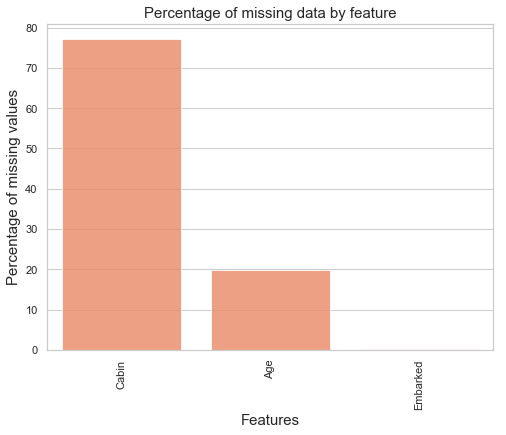

In [185]:
missingdata(train_df)

In [186]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

,Total,Percent
Cabin,327,78.229665
Age,86,20.574163
Fare,1,0.239234


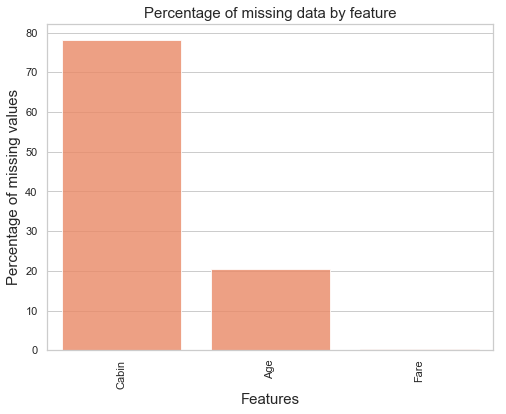

In [187]:
missingdata(test_df)

##### 78% of the values for 'Cabin' Feature are missing, which means that imputing information and it's not advisable to use this variable in our prediction. Therefore, we'll ignore this variable in our model.
##### 20% of the values for passenger age are missing. 
##### Let's see what the 'Age' variable looks like in general.

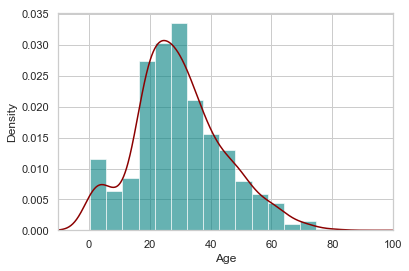

In [188]:
ax = train_df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
train_df["Age"].plot(kind='density', color='darkred')
ax.set(xlabel='Age')
plt.xlim(-10,100)
plt.show()

##### Since "Age" is (right) skewed, using the mean might give us biased results by filling in ages that are older than desired. 
##### To deal with this, we'll use the median to impute the missing values. 

In [189]:
# median age
print('The median Age is %.2f' %(train_df["Age"].median(skipna=True)))

The median Age is 28.00


##### There are only 2 (0.22%) missing values for "Embarked".
##### So we can just impute with the port where most people boarded.

In [190]:
print('The most common boarding port of embarkation is %s.' %train_df['Embarked'].value_counts().idxmax())

The most common boarding port of embarkation is S.


### Data Imputation

In [191]:
train_data = train_df.copy()
train_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)# Impute missing values with the median age
train_data["Embarked"].fillna(train_df['Embarked'].value_counts().idxmax(), inplace=True)#Impute missing values with the port where most people boarded
train_data.drop('Cabin', axis=1, inplace=True)# Dropping the "cabins" feature

In [192]:
# check missing values in adjusted train data
train_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [193]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [194]:
test_data = test_df.copy()
test_data["Age"].fillna(train_df["Age"].median(skipna=True), inplace=True)
test_data["Fare"].fillna(train_df["Fare"].median(skipna=True), inplace=True)
test_data.drop('Cabin', axis=1, inplace=True)

In [195]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


### Feature Engineering

In [196]:
## Combine test and train as single dataframe to apply some functions
all_data=[train_data,test_data]
# Create new feature FamilySize as a combination of SibSp and Parch, Age Bin and Fare Bins to bin the ages and fare into respective categories
for dataset in all_data:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1
    dataset['Age_bin'] = pd.cut(dataset['Age'], bins=[0,12,20,40,120], labels=['Children','Teenage','Adult','Elder'])
    dataset['Fare_bin'] = pd.cut(dataset['Fare'], bins=[0,7.91,14.45,31,120], labels=['Low_fare','median_fare','Average_fare','high_fare'])
    
                                                                                      

In [197]:
import re
# Define function to extract titles from passenger names
def get_title(name):
    title_search = re.search(' ([A-Za-z]+)\.', name)
    # If the title exists, extract and return it.
    if title_search:
        return title_search.group(1)
    return ""
# Create a new feature Title, containing the titles of passenger names
for dataset in all_data:
    dataset['Title'] = dataset['Name'].apply(get_title)
# Group all non-common titles into one single grouping "Other"
for dataset in all_data:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess','Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Other')

    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [198]:
### for our reference making a copy of both DataSet start working for copy of dataset
traindf=train_data
testdf=test_data

In [199]:
all_dat=[traindf,testdf]

In [200]:
traindf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,FamilySize,Age_bin,Fare_bin,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,2,Adult,Low_fare,Mr
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,2,Adult,high_fare,Mrs
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,1,Adult,median_fare,Miss
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,2,Adult,high_fare,Mrs
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,1,Adult,median_fare,Mr


In [201]:
for dataset in all_dat:
    drop_column = ['Name','Ticket','PassengerId']
    dataset.drop(drop_column, axis=1, inplace = True)

In [202]:
traindf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Age_bin,Fare_bin,Title
0,0,3,male,22.0,1,0,7.2500,S,2,Adult,Low_fare,Mr
1,1,1,female,38.0,1,0,71.2833,C,2,Adult,high_fare,Mrs
2,1,3,female,26.0,0,0,7.9250,S,1,Adult,median_fare,Miss
3,1,1,female,35.0,1,0,53.1000,S,2,Adult,high_fare,Mrs
4,0,3,male,35.0,0,0,8.0500,S,1,Adult,median_fare,Mr


In [203]:
testdf.head(2)

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize,Age_bin,Fare_bin,Title
0,3,male,34.5,0,0,7.8292,Q,1,Adult,Low_fare,Mr
1,3,female,47.0,1,0,7.0000,S,2,Elder,Low_fare,Mrs


#### Convert Categorical Features into dummy variables

In [204]:
train_df = pd.get_dummies(traindf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Embarked","Fare_type"])

In [205]:
test_df = pd.get_dummies(testdf, columns = ["Sex","Title","Age_bin","Embarked","Fare_bin"],
                             prefix=["Sex","Title","Age_type","Embarked","Fare_type"])

In [206]:
train_df.head(2)

,Survived,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Title_Master,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,0,3,22.0,1,0,7.2500,2,0,1,0,...,0,1,0,0,0,1,1,0,0,0
1,1,1,38.0,1,0,71.2833,2,1,0,0,...,0,1,0,1,0,0,0,0,0,1


In [207]:
test_df.head(2)

,Pclass,Age,SibSp,Parch,Fare,FamilySize,Sex_female,Sex_male,Title_Master,Title_Miss,...,Age_type_Teenage,Age_type_Adult,Age_type_Elder,Embarked_C,Embarked_Q,Embarked_S,Fare_type_Low_fare,Fare_type_median_fare,Fare_type_Average_fare,Fare_type_high_fare
0,3,34.5,0,0,7.8292,1,0,1,0,0,...,0,1,0,0,1,0,1,0,0,0
1,3,47.0,1,0,7.0000,2,1,0,0,0,...,0,0,1,0,0,1,1,0,0,0


### Logistic Regression

In [231]:
from sklearn.model_selection import train_test_split #to split the dataframe
from sklearn.metrics import accuracy_score  #accuracy_score
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix #for confusion matrix
all_features = train_df.drop("Survived",axis=1)#Remove the target column from the train feature set
Targeted_feature = train_df["Survived"]
X_train,X_test,y_train,y_test = train_test_split(all_features,Targeted_feature,test_size=0.3,random_state=42)
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((623, 24), (268, 24), (623,), (268,))

The accuracy of the Logistic Regression model is 81.72


Text(0.5, 1.05, 'Confusion Matrix')

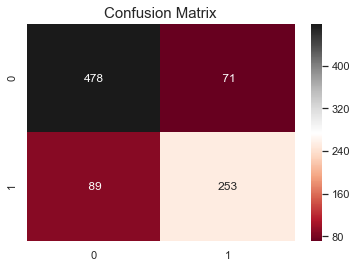

In [238]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train,y_train)
prediction_lr=model.predict(X_test)
print('The accuracy of the Logistic Regression model is',round(accuracy_score(prediction_lr,y_test)*100,2))
y_pred = cross_val_predict(model,all_features,Targeted_feature,cv=10)
sns.heatmap(confusion_matrix(Targeted_feature,y_pred),annot=True,fmt='3.0f',cmap="RdGy")
plt.title('Confusion Matrix', y=1.05, size=15)